In [1]:
import numpy as np 
import pandas as pd
from epiweeks import Week
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from utils import load_preds
import matplotlib as mpl
# Definir a cor das bordas (spines) como cinza
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'

In [2]:
data_all = pd.read_csv('../data/dengue_uf.csv.gz')
data_all.date = pd.to_datetime(data_all.date)

In [3]:
state = 'PR'

In [12]:
Week(2022, 25).startdate()

datetime.date(2022, 6, 19)

In [ ]:
data_all

Text(0.5, 1.0, 'PR')

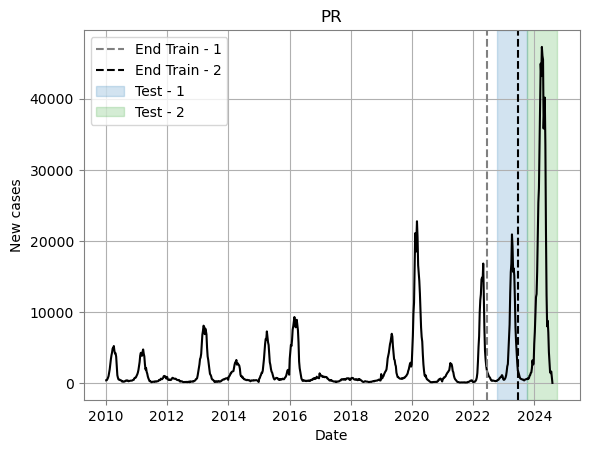

In [29]:
data_ = data_all.loc[data_all.uf == state]

fig, ax = plt.subplots()

ax.plot(data_.date,data_.casos,color = 'black')
ax.grid()

ax.set_ylabel('New cases')
ax.set_xlabel('Date')

ax.axvline(pd.to_datetime(Week(2022, 25).startdate()), color = 'gray', ls = '--', label = 'End Train - 1')

ax.axvline(pd.to_datetime(Week(2023, 25).startdate()), color = 'black', ls = '--', label = 'End Train - 2')

ax.axvspan(
        pd.to_datetime(Week(2022, 41).startdate()),
        pd.to_datetime(Week(2023, 40).startdate()),
        color="tab:blue",
        alpha=0.2,  # Adjust transparency
        label=f"Test - 1"
)

ax.axvspan(
        pd.to_datetime(Week(2023, 41).startdate()),
        pd.to_datetime(Week(2024, 40).startdate()),
        color="tab:green",
        alpha=0.2,  # Adjust transparency
        label=f"Test - 2"
)

ax.legend()

ax.set_title(state)

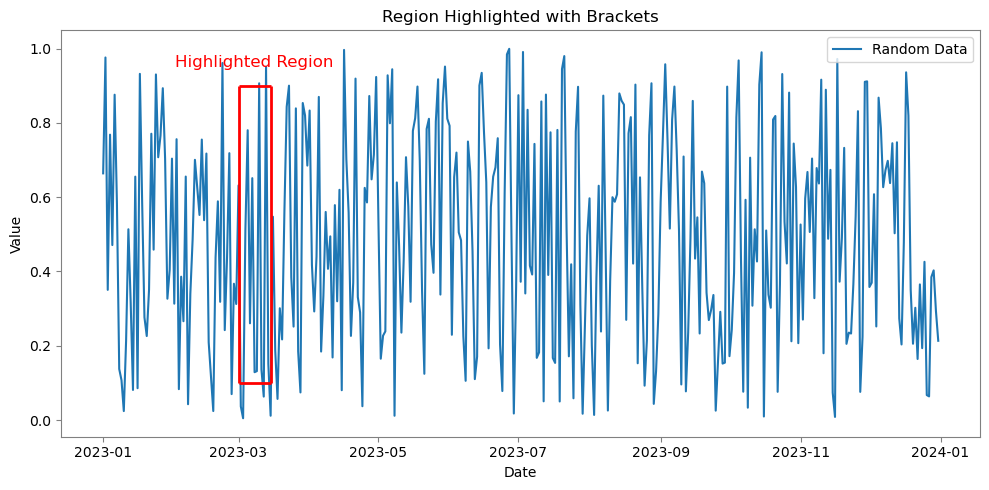

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate example data
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
values = np.random.rand(len(dates))

# Create a DataFrame
data = pd.DataFrame({"Date": dates, "Value": values})

# Define the range to highlight
highlight_start = "2023-03-01"
highlight_end = "2023-03-15"

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data["Date"], data["Value"], label="Random Data")

# Highlight the region with brackets
highlight_xmin = pd.to_datetime(highlight_start)
highlight_xmax = pd.to_datetime(highlight_end)
highlight_ymin = 0.1  # Adjust as needed
highlight_ymax = 0.9  # Adjust as needed

# Draw the brackets
bracket_color = "red"
ax.hlines(y=highlight_ymin, xmin=highlight_xmin, xmax=highlight_xmax, color=bracket_color, linewidth=2)
ax.hlines(y=highlight_ymax, xmin=highlight_xmin, xmax=highlight_xmax, color=bracket_color, linewidth=2)
ax.vlines(x=highlight_xmin, ymin=highlight_ymin, ymax=highlight_ymax, color=bracket_color, linewidth=2)
ax.vlines(x=highlight_xmax, ymin=highlight_ymin, ymax=highlight_ymax, color=bracket_color, linewidth=2)

# Annotate the bracket
ax.text(
    x=(highlight_xmin + (highlight_xmax - highlight_xmin) / 2),
    y=highlight_ymax + 0.05,
    s="Highlighted Region",
    color=bracket_color,
    fontsize=12,
    ha="center",
)

# Formatting the plot
ax.set_title("Region Highlighted with Brackets")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()
plt.tight_layout()
plt.show()